In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('../../surface_CW2019_lake_mean_da_asc_hv.csv')

In [3]:
df

,time,lake,id,sar:polarizations,sar:resolution_azimuth,sar:pixel_spacing_azimuth,sar:pixel_spacing_range,s1:resolution,s1:slice_number,sat:relative_orbit,...,sat:platform_international_designator,s1:datatake_id,s1:product_timeliness,raster:bands,title,description,epsg,spatial_ref,band,stackstac-b124f8334a91a0e81288fb39f568bc47
0,2019-01-06 20:47:13.068929,1.0,S1A_IW_GRDH_1SDH_20190106T204700_20190106T2047...,"['HH', 'HV']",22,10,10,high,8,90,...,2014-016A,184005,Fast-24h,"{'nodata': -32768, 'data_type': 'float32', 'sp...","HV: horizontal transmit, vertical receive",Terrain-corrected gamma naught values of signa...,3413,0,hv,-17.120810
1,2019-01-06 20:47:13.068929,2.0,S1A_IW_GRDH_1SDH_20190106T204700_20190106T2047...,"['HH', 'HV']",22,10,10,high,8,90,...,2014-016A,184005,Fast-24h,"{'nodata': -32768, 'data_type': 'float32', 'sp...","HV: horizontal transmit, vertical receive",Terrain-corrected gamma naught values of signa...,3413,0,hv,-12.463030
2,2019-01-06 20:47:13.068929,4.0,S1A_IW_GRDH_1SDH_20190106T204700_20190106T2047...,"['HH', 'HV']",22,10,10,high,8,90,...,2014-016A,184005,Fast-24h,"{'nodata': -32768, 'data_type': 'float32', 'sp...","HV: horizontal transmit, vertical receive",Terrain-corrected gamma naught values of signa...,3413,0,hv,-13.493444
3,2019-01-06 20:47:13.068929,5.0,S1A_IW_GRDH_1SDH_20190106T204700_20190106T2047...,"['HH', 'HV']",22,10,10,high,8,90,...,2014-016A,184005,Fast-24h,"{'nodata': -32768, 'data_type': 'float32', 'sp...","HV: horizontal transmit, vertical receive",Terrain-corrected gamma naught values of signa...,3413,0,hv,-19.958158
4,2019-01-06 20:47:13.068929,6.0,S1A_IW_GRDH_1SDH_20190106T204700_20190106T2047...,"['HH', 'HV']",22,10,10,high,8,90,...,2014-016A,184005,Fast-24h,"{'nodata': -32768, 'data_type': 'float32', 'sp...","HV: horizontal transmit, vertical receive",Terrain-corrected gamma naught values of signa...,3413,0,hv,-20.034009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30775,2019-12-26 20:47:03.222614,485.0,S1B_IW_GRDH_1SDH_20191226T204650_20191226T2047...,"['HH', 'HV']",22,10,10,high,9,90,...,2016-025A,151255,Fast-24h,"{'nodata': -32768, 'data_type': 'float32', 'sp...","HV: horizontal transmit, vertical receive",Terrain-corrected gamma naught values of signa...,3413,0,hv,NaN
30776,2019-12-26 20:47:03.222614,487.0,S1B_IW_GRDH_1SDH_20191226T204650_20191226T2047...,"['HH', 'HV']",22,10,10,high,9,90,...,2016-025A,151255,Fast-24h,"{'nodata': -32768, 'data_type': 'float32', 'sp...","HV: horizontal transmit, vertical receive",Terrain-corrected gamma naught values of signa...,3413,0,hv,-14.775611
30777,2019-12-26 20:47:03.222614,495.0,S1B_IW_GRDH_1SDH_20191226T204650_20191226T2047...,"['HH', 'HV']",22,10,10,high,9,90,...,2016-025A,151255,Fast-24h,"{'nodata': -32768, 'data_type': 'float32', 'sp...","HV: horizontal transmit, vertical receive",Terrain-corrected gamma naught values of signa...,3413,0,hv,-18.570867
30778,2019-12-26 20:47:03.222614,995.0,S1B_IW_GRDH_1SDH_20191226T204650_20191226T2047...,"['HH', 'HV']",22,10,10,high,9,90,...,2016-025A,151255,Fast-24h,"{'nodata': -32768, 'data_type': 'float32', 'sp...","HV: horizontal transmit, vertical receive",Terrain-corrected gamma naught values of signa...,3413,0,hv,-19.924048


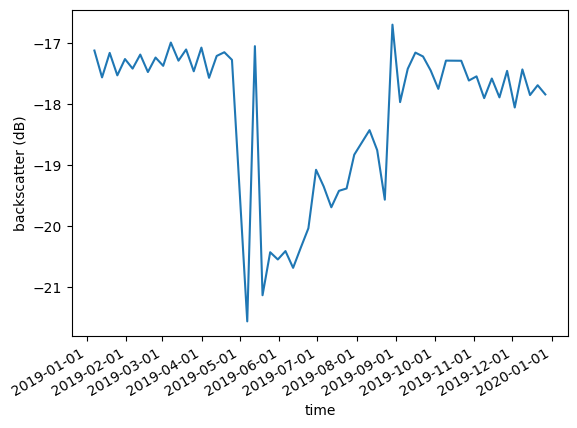

In [4]:
lake1 = df[df['lake'] == 1]
lake1 = lake1.iloc[:,[0,-1]].set_index('time').dropna()
lake1.index = pd.to_datetime(lake1.index)
ax = lake1.plot(legend=False)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_ylabel('backscatter (dB)')
plt.savefig('./lake_1_backscatter.png',dpi=300)

In [5]:
lake_ids = np.unique(df.lake)
fig, ax = plt.subplots()
for lake_id in lake_ids:
    lake = df[df['lake'] == lake_id]
    lake = lake.iloc[:,[0,-1]].set_index('time').dropna()
    lake.index = pd.to_datetime(lake.index)
    lake.plot(legend=False,ax=ax)
    plt.close()

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_ylabel('backscatter (dB)')
ax.set_title('100 km$^{2}$ CW Subset')

Text(0.5, 1.0, '100 km$^{2}$ CW Subset')

In [6]:
fig.savefig('./all_backscatter.png',dpi=300)

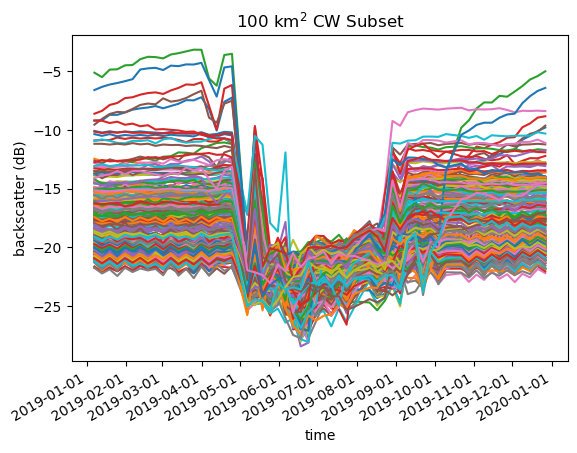

In [7]:
fig